# Modeling relationships with referential constraints
## DataJoint example

In [1]:
import datajoint as dj

In [2]:
schema = dj.Schema('dimitri_language')

[2022-09-13 16:20:55,368][INFO]: Connecting dimitri@db.ust-data-sci.net:3306
[2022-09-13 16:20:55,889][INFO]: Connected dimitri@db.ust-data-sci.net:3306


In [3]:
@schema
class Title(dj.Lookup):
    definition = """
    title_code  : char(8)
    ---
    full_title : varchar(120)
    """
    
    contents = [
        ("SW-Dev1", "Software Developer 1"),
        ("SW-Dev2", "Software Developer 2"),
        ("SW-Dev3", "Software Developer 3"),
        ("Web-Dev1", "Web Developer 1"),
        ("Web-Dev2", "Web Developer 2"),
        ("Web-Dev3", "Web Developer 3"),
        ("HR-Mgr", "Human Resources Manager")
    ]

In [4]:
Title()

title_code,full_title
HR-Mgr,Human Resources Manager
SW-Dev1,Software Developer 1
SW-Dev2,Software Developer 2
SW-Dev3,Software Developer 3
Web-Dev1,Web Developer 1
Web-Dev2,Web Developer 2
Web-Dev3,Web Developer 3


In [5]:
@schema
class Person(dj.Manual):
    definition = """
    person_id  :  int 
    ---
    first_name : varchar(30)
    last_name : varchar(30)
    -> Title
    """

In [ ]:
dj.config

In [ ]:
Person()

In [ ]:
Person.insert1((2, "Jane", "Doe", "HR-Mgr"))

In [ ]:
Person()

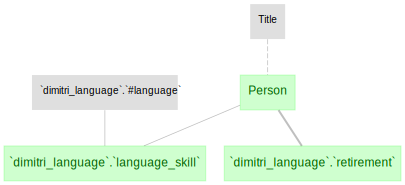

In [6]:
dj.Diagram(schema)

A foreign key

In [ ]:
Title.delete()

In [ ]:
Person().delete()

In [ ]:
Person.insert1((3, "Johnny", "Cash", "Web-Dev3"))

In [ ]:
Person()

In [ ]:
Title().delete()

In [ ]:
Title & {'title_code': "HR-Mgr"}

In [ ]:
(Title & {'title_code': "Web-Dev2"}).delete()

In [7]:
@schema
class Retirement(dj.Manual):
    definition = """
    -> Person
    ---
    retirement_date : date
    """

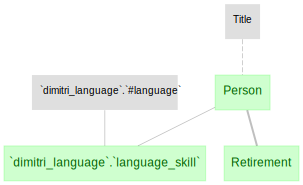

In [8]:
dj.Diagram(schema)

In [9]:
Retirement()

person_id,retirement_date


In [10]:
Title.drop()

`dimitri_language`.`#title` (7 tuples)
`dimitri_language`.`person` (3 tuples)
`dimitri_language`.`language_skill` (4 tuples)
`dimitri_language`.`retirement` (0 tuples)
Proceed? [yes, No]: 


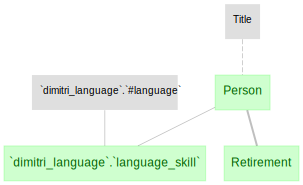

In [11]:
dj.Diagram(schema)

In [12]:
@schema 
class Language(dj.Lookup):
    definition = """
    lang_code  : char(8)
    ---
    language : varchar(20)
    """
    
    contents = [
        ("Eng", "English"),
        ("Nav", "Navajo"),
        ("Fr", "French"),
        ("It", "Italian")        
    ]

In [13]:
Language()

lang_code,language
Eng,English
Fr,French
It,Italian
Nav,Navajo


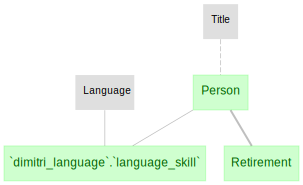

In [14]:
dj.Diagram(schema)

In [15]:
@schema
class LanguageSkill(dj.Manual):
    definition = """
    -> Person
    -> Language
    ---
    skill_level  : enum("beginner", "intermediate", "fluent", "native")
    """

In [16]:
Person()

person_id,first_name,last_name,title_code
1,Jane,Doe,HR-Mgr
2,Jane,Doe,HR-Mgr
3,Johnny,Cash,Web-Dev3


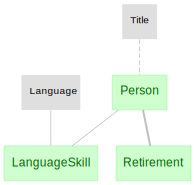

In [17]:
dj.Diagram(schema)

In [ ]:
LanguageSkill.insert1((1, "Eng", "native"))

In [ ]:
LanguageSkill.insert1((1, "It", "native"))

In [ ]:
LanguageSkill()

In [ ]:
LanguageSkill.insert1((2, "Eng", "native"))


In [ ]:
LanguageSkill.insert1((2, "Fr", "intermediate"))

In [ ]:
LanguageSkill()

# Now in SQL

In [ ]:
# prepare SQL Magic
import json
with open('cred.json') as f:
    creds = json.load(f)
    
connection_string = "mysql://{user}:{password}@{host}".format(**creds)

import pymysql 
pymysql.install_as_MySQLdb()

In [ ]:
%load_ext sql
%config SqlMagic.autocommit=True

In [ ]:
%sql $connection_string

In [ ]:
%%sql

CREATE SCHEMA dimitri_language2;

In [ ]:
%%sql

CREATE TABLE dimitri_language2.title ( 
    title_code  char(8) NOT NULL,
    full_title varchar(120) NOT NULL,
    PRIMARY KEY (title_code))

In [ ]:
%%sql

CREATE TABLE dimitri_language2.person (
    person_id INT NOT NULL,  
    first_name varchar(30) NOT NULL,
    last_name varchar(30) NOT NULL,
    title_code  char(8) NOT NULL,
    PRIMARY KEY(person_id),
    FOREIGN KEY (title_code) REFERENCES dimitri_language2.title(title_code))

In [ ]:
%%sql

CREATE TABLE dimitri_language2.language (    
    lang_code char(8) NOT NULL,
    language  varchar(20) NOT NULL,
    PRIMARY KEY(lang_code)
)


In [ ]:
%%sql


CREATE TABLE dimitri_language2.language_skill (    
    person_id int NOT NULL,
    lang_code char(8) NOT NULL,
    skill_level enum("beginner", "intermediate", "fluent", "native"),
    PRIMARY KEY(person_id, lang_code),
    FOREIGN KEY(person_id) REFERENCES dimitri_language2.person (person_id), 
    FOREIGN KEY(lang_code) REFERENCES dimitri_language2.language (lang_code)
)